In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import io
import zipfile
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifierCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, accuracy_score, precision_score,\
                            recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
zip_file_path = "/content/online_news_popularity.zip"
# Extract the CSV file from the zip
# Extract the CSV file from the zip
with ZipFile(zip_file_path, 'r') as zip_ref:
  # Get the names of all files in the zip
  file_names = zip_ref.namelist()

  # Find the CSV file name (assuming there's only one)
  csv_file = [name for name in file_names if name.endswith(".csv")][0]

  # Extract the CSV file to a temporary location (optional)
  # zip_ref.extract(csv_file)  # Uncomment if needed

  # Read the CSV data directly from the zip using ZipFile.open
  with zip_ref.open(csv_file) as csv_file:
    data = pd.read_csv(csv_file)

# Print the DataFrame head (first few rows)
print(data.head())

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

In [7]:
print(data.columns.tolist())

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [9]:
# choose features and target
X = data.iloc[:, 2:60]  # all columns except url and target
y = data.iloc[:, -1].values.ravel()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [10]:
# Add a column with two classes, 0 for unpopular (shares <= 1400) and 1 for popular (shares > 1400)
data['popularity'] = [1 if shares > 1400 else 0 for shares in data[' shares'].values]

# X = all columns except url, timedelta and target
X = data.iloc[:, 2:-1]

# Y = target: popularity (two classes, 0 and 1)
y = data['popularity'].values

# Divide X & Y in 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [6]:
print(data.columns.tolist())

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [13]:
# Decision Tree
dec_clf = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
dec_clf.fit(X_train, y_train)

# Random Forest
rnd_clf = RandomForestClassifier(n_estimators=110, max_features=5, min_samples_leaf=7)
rnd_clf.fit(X_train, y_train)

# Support Vector Machine
svm_clf = SVC(kernel='rbf', random_state=0)
svm_clf.fit(X_train, y_train)

# K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=4)
knn_clf.fit(X_train, y_train)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)


GaussianNB()

In [14]:
# Accuracy Score
print("Decision Tree Accuracy Score:", dec_clf.score(X_test, y_test))
print("Random Forest Accuracy Score:", rnd_clf.score(X_test, y_test))
print("SVM Accuracy Score:", svm_clf.score(X_test, y_test))
print("KNN Accuracy Score:", knn_clf.score(X_test, y_test))
print("Naive Bayes Accuracy Score:", nb_clf.score(X_test, y_test))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
print("Decision Tree MSE:", mean_squared_error(y_test, dec_clf.predict(X_test)))
print("Random Forest MSE:", mean_squared_error(y_test, rnd_clf.predict(X_test)))
print("SVM MSE:", mean_squared_error(y_test, svm_clf.predict(X_test)))
print("KNN MSE:", mean_squared_error(y_test, knn_clf.predict(X_test)))
print("Naive Bayes MSE:", mean_squared_error(y_test, nb_clf.predict(X_test)))

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print("Decision Tree MAE:", mean_absolute_error(y_test, dec_clf.predict(X_test)))
print("Random Forest MAE:", mean_absolute_error(y_test, rnd_clf.predict(X_test)))
print("SVM MAE:", mean_absolute_error(y_test, svm_clf.predict(X_test)))
print("KNN MAE:", mean_absolute_error(y_test, knn_clf.predict(X_test)))
print("Naive Bayes MAE:", mean_absolute_error(y_test, nb_clf.predict(X_test)))


Decision Tree Accuracy Score: 1.0
Random Forest Accuracy Score: 1.0
SVM Accuracy Score: 0.6331189305082608
KNN Accuracy Score: 0.6959263463236222
Naive Bayes Accuracy Score: 0.8636650271156514
Decision Tree MSE: 0.0
Random Forest MSE: 0.0
SVM MSE: 0.3668810694917392
KNN MSE: 0.30407365367637784
Naive Bayes MSE: 0.1363349728843486
Decision Tree MAE: 0.0
Random Forest MAE: 0.0
SVM MAE: 0.3668810694917392
KNN MAE: 0.30407365367637784
Naive Bayes MAE: 0.1363349728843486


In [29]:
dec_pred = dec_clf.predict(X_test)
rnd_pred = rnd_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
knn_pred = knn_clf.predict(X_test)
nb_pred = nb_clf.predict(X_test)

In [16]:


models = ["Decision Tree","Random Forest","SVM","KNN","Naive Bayes"]
accuracy = [1.0, 1.0, 0.6331189305082608, 0.6959263463236222, 0.8636650271156514]
mse = [0.0, 0.0, 0.3668810694917392, 0.30407365367637784, 0.1363349728843486]
mae = [0.0, 0.0, 0.3668810694917392, 0.30407365367637784, 0.1363349728843486]


<ipython-input-27-0f2348fc2fa1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='Set2')


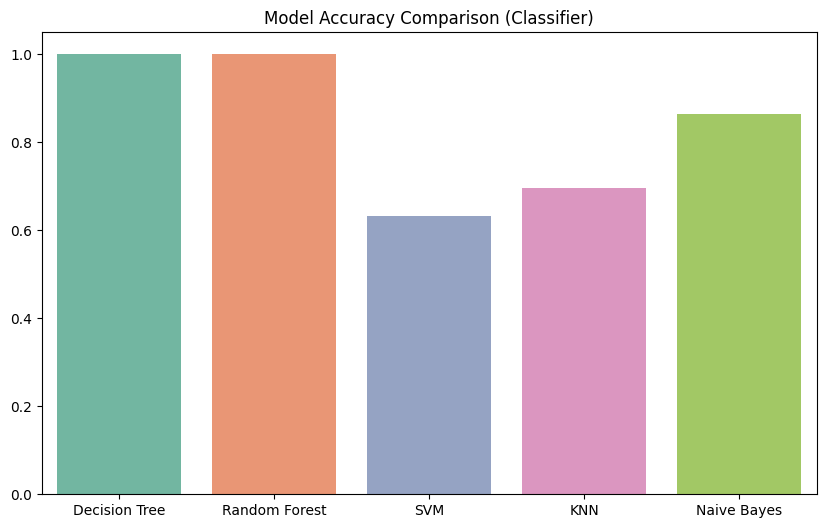

<ipython-input-27-0f2348fc2fa1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse, palette='Set2')


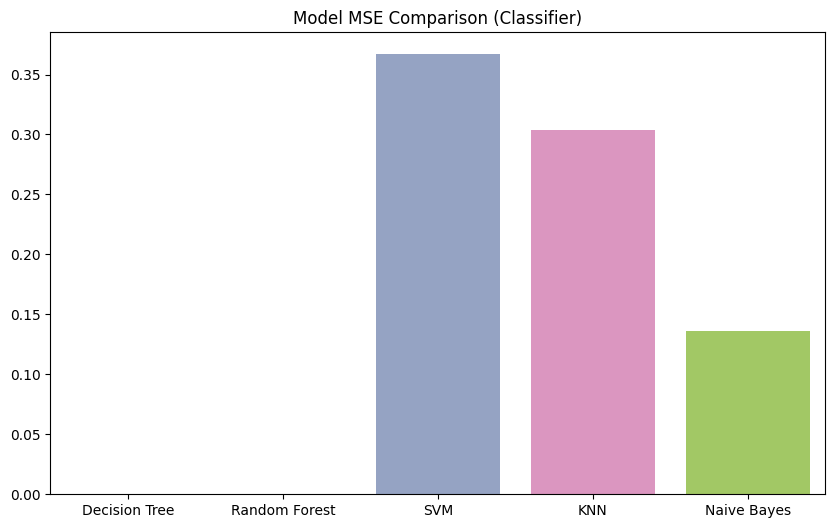

<ipython-input-27-0f2348fc2fa1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae, palette='Set2')


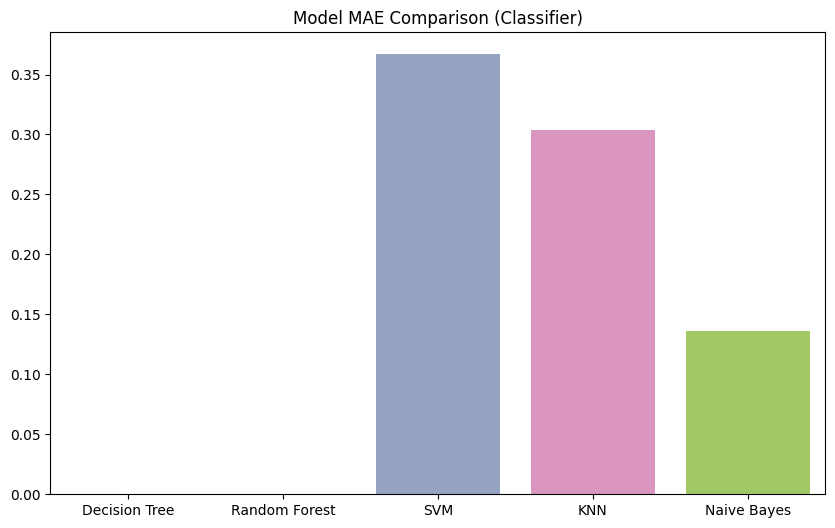

           Model  Accuracy       MSE       MAE
0  Decision Tree  1.000000  0.000000  0.000000
1  Random Forest  1.000000  0.000000  0.000000
2            SVM  0.633119  0.366881  0.366881
3            KNN  0.695926  0.304074  0.304074
4    Naive Bayes  0.863665  0.136335  0.136335


In [27]:

# Create a bar chart of the accuracy, MSE, and MAE for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy, palette='Set2')
plt.title('Model Accuracy Comparison (Classifier)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse, palette='Set2')
plt.title('Model MSE Comparison (Classifier)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae, palette='Set2')
plt.title('Model MAE Comparison (Classifier)')
plt.show()

# Create a comparison table of the accuracy, MSE, and MAE for each model
df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'MSE': mse, 'MAE': mae})
print(df.to_string())


In [30]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix for each model
dec_cm = confusion_matrix(y_test, dec_pred)
rnd_cm = confusion_matrix(y_test, rnd_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
nb_cm = confusion_matrix(y_test, nb_pred)



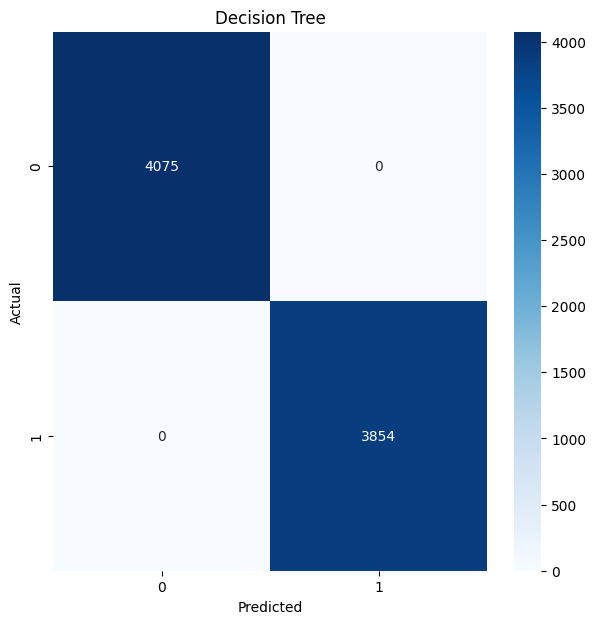

In [33]:
# Plot the confusion matrices
plt.figure(figsize=(7, 7))

# Decision Tree
sns.heatmap(dec_cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['popularity'].unique(), yticklabels=data['popularity'].unique())
plt.title("Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()
plt.show()


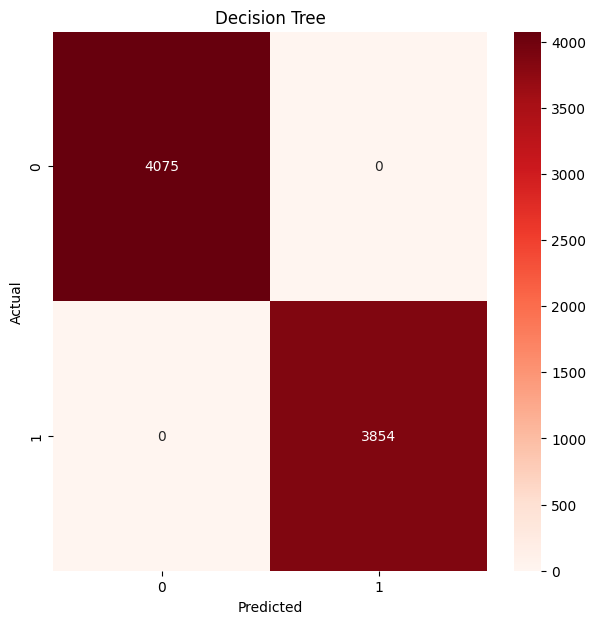

In [35]:
# Plot the confusion matrices
plt.figure(figsize=(7, 7))

# Decision Tree
sns.heatmap(rnd_cm, annot=True, fmt="d", cmap="Reds", xticklabels=data['popularity'].unique(), yticklabels=data['popularity'].unique())
plt.title("Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()
plt.show()

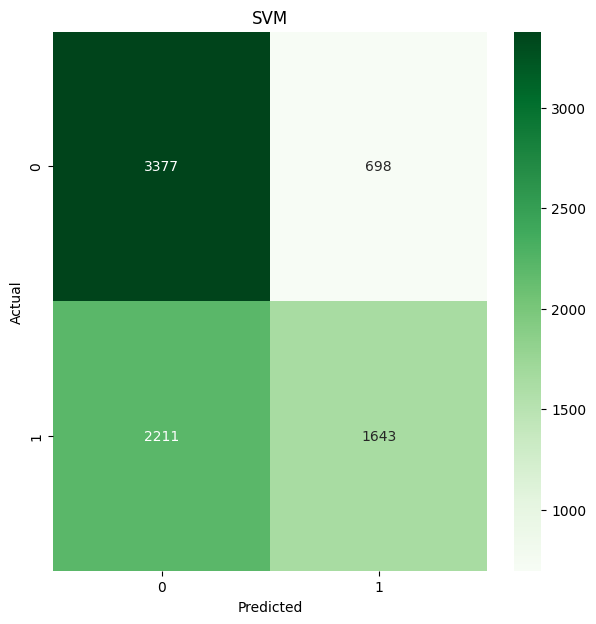

In [36]:
# SVM
plt.figure(figsize=(7, 7))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Greens", xticklabels=data['popularity'].unique(), yticklabels=data['popularity'].unique())
plt.title("SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()
plt.show()

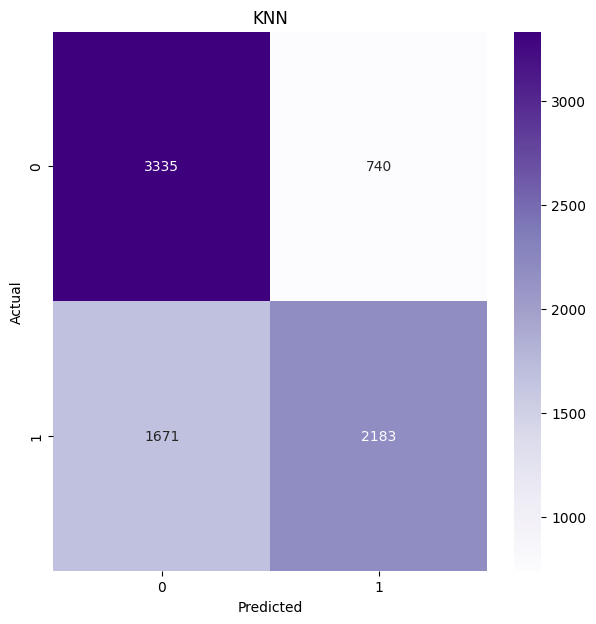

In [38]:
# KNN
plt.figure(figsize=(7, 7))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Purples", xticklabels=data['popularity'].unique(), yticklabels=data['popularity'].unique())
plt.title("KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()
plt.show()

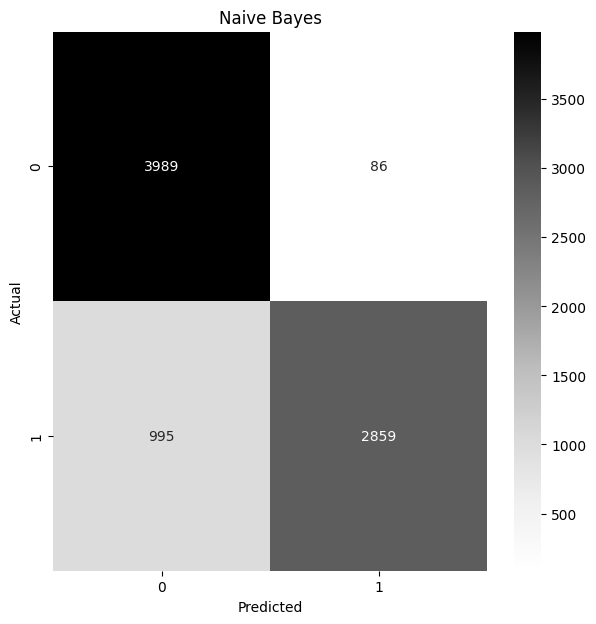

In [40]:
#Naive Bayes
plt.figure(figsize=(7, 7))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Greys", xticklabels=data['popularity'].unique(), yticklabels=data['popularity'].unique())
plt.title("Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()
plt.show()

# Comparison with Regression Models

Data:


```
accuracies_regr = {
    "linear_reg": {"best_score": -157843068.32818705, "test_score": 0.014716422233365334},
    "logistic_reg": {"best_score": -131106885.81478795, "test_score": 0.02497879266852976},
    "lasso_reg": {"best_score": -134772690.83866498, "test_score": 0.015497879266852976},
    "ridge_reg": {"best_score": -180081126.5782509, "test_score": 0.01471716570889725},
    "random_forest_reg": {"best_score": -139934689.6662972, "test_score": -0.09628774466166812},
}


mse_regr = {  # Assuming mse_regr holds the negative mean squared error values
    "linear_reg": -157843068.32818705,
    "logistic_reg": -131106885.81478795,
    "lasso_reg": -134772690.83866498,
    "ridge_reg": -180081126.5782509,
    "random_forest_reg": -139934689.6662972,
}


```


In [45]:

models_reg = ["Linear Regression", "Logistic Regression", "Lasso Regression", "Ridge Regression", "Random Forest Regression"]
mse_reg = [-157843068.32818705,-131106885.81478795,-134772690.83866498,-180081126.5782509,-139934689.6662972]
test_score_reg = [0.014716422233365334,0.02497879266852976,0.015497879266852976,0.01471716570889725,-0.09628774466166812]



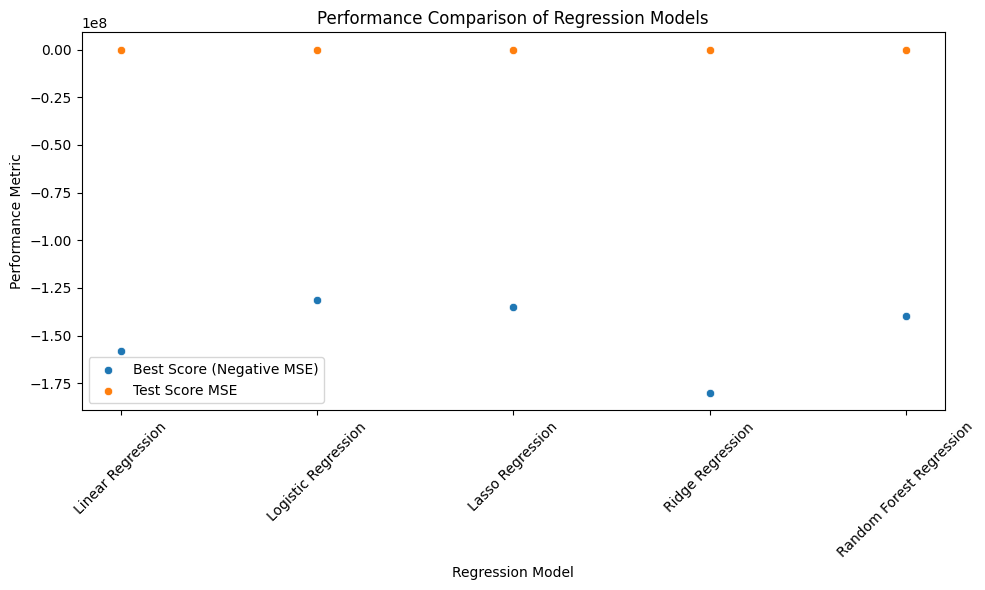

In [47]:

# Define data for regression models

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=models, y=mse_reg, label="Best Score (Negative MSE)")
sns.scatterplot(x=models, y=test_score_reg, label="Test Score MSE")
plt.xlabel("Regression Model")
plt.ylabel("Performance Metric")
plt.title("Performance Comparison of Regression Models")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


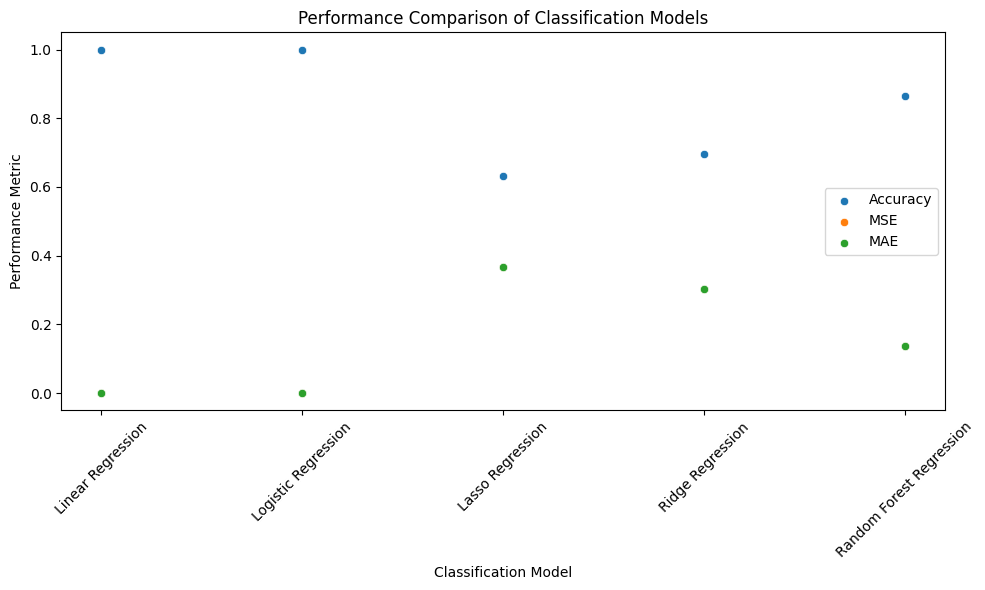

In [48]:
# Create scatter plot of Classification Algorithms
plt.figure(figsize=(10, 6))
sns.scatterplot(x=models, y=accuracy, label="Accuracy")
sns.scatterplot(x=models, y=mse, label="MSE")
sns.scatterplot(x=models, y=mae, label="MAE")
plt.xlabel("Classification Model")
plt.ylabel("Performance Metric")
plt.title("Performance Comparison of Classification Models")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-49-e644ab76ba2c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_all, y=accuracy_all, palette='Set2')


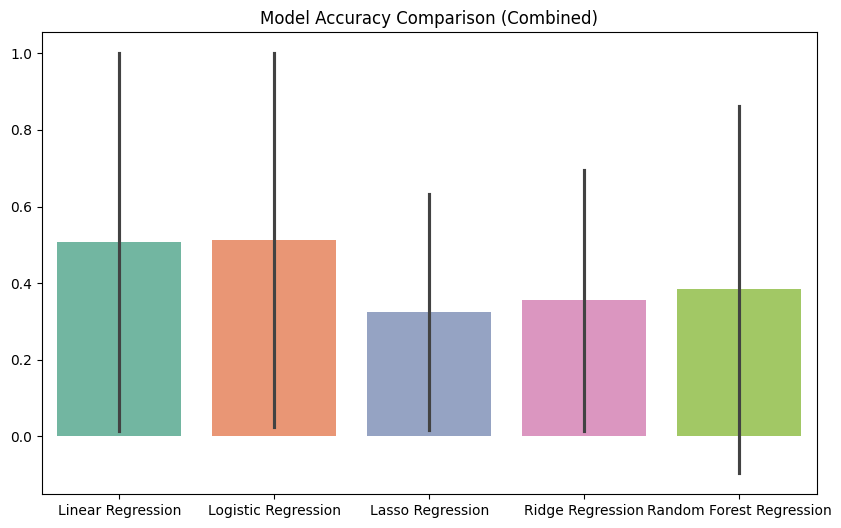

<ipython-input-49-e644ab76ba2c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_all, y=mse_all, palette='Set2')


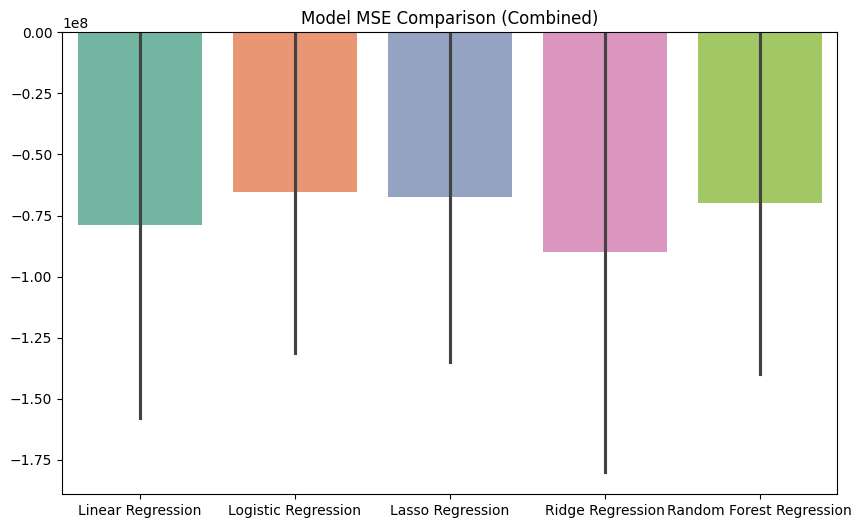

                      Model  Accuracy           MSE
0         Linear Regression  1.000000  0.000000e+00
1       Logistic Regression  1.000000  0.000000e+00
2          Lasso Regression  0.633119  3.668811e-01
3          Ridge Regression  0.695926  3.040737e-01
4  Random Forest Regression  0.863665  1.363350e-01
5         Linear Regression  0.014716 -1.578431e+08
6       Logistic Regression  0.024979 -1.311069e+08
7          Lasso Regression  0.015498 -1.347727e+08
8          Ridge Regression  0.014717 -1.800811e+08
9  Random Forest Regression -0.096288 -1.399347e+08


In [49]:
# Create a combined dataset for all models
models_all = models + models_reg
accuracy_all = accuracy + test_score_reg
mse_all = mse + mse_reg

# Create a bar chart of the accuracy, MSE, and MAE for all models
plt.figure(figsize=(10, 6))
sns.barplot(x=models_all, y=accuracy_all, palette='Set2')
plt.title('Model Accuracy Comparison (Combined)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=models_all, y=mse_all, palette='Set2')
plt.title('Model MSE Comparison (Combined)')
plt.show()

# Create a comparison table of the accuracy, MSE, and MAE for all models
df_all = pd.DataFrame({'Model': models_all, 'Accuracy': accuracy_all, 'MSE': mse_all})
print(df_all.to_string())
